<h1>Atliq Grands Hospitality Analysis Project

<h3><u>Project Overview </u>
<h5>This Jupyter Notebook analyzes hospitality data for Atliq Grands, focusing on bookings, occupancy rates, revenue, and other key metrics. The analysis includes data cleaning, exploration, and insights derived from various datasets such as bookings, aggregated bookings, hotels, rooms, and dates.


<h3><u>Objectives</u>
<h5> - Understand booking patterns and platforms.
<h5> - Calculate occupancy percentages.
<h5> - Analyze revenue and ratings by city, property, and other dimensions.
<h5> - Identify trends over time and by categories.


<h3> <u>Datasets Used </u>
<h5> - fact_bookings.csv: Detailed booking information.
<h5> - fact_aggregated_bookings.csv: Aggregated booking data with capacity.
<h5> - dim_rooms.csv: Room categories and classes.
<h5> - dim_hotels.csv: Hotel properties, categories, and cities.
<h5> - dim_date.csv: Date dimensions for analysis.
<h5> - new_data_august.csv: Additional data for August.

<h3><u>Libraries Used</u>
<h5> - pandas: For data manipulation and analysis.
<h5> - matplotlib: For plotting (implicit in pandas plotting).

In [ ]:
# Import necessary libraries
import pandas as pd

<h3>Section 1: Loading and Initial Exploration of Bookings Data
<h5>In this section, we load the bookings data and perform initial data exploration to understand the structure, unique values, and basic statistics.

In [ ]:
# Load the bookings dataset
df_bookings = pd.read_csv("fact_bookings.csv")

# Display the first few rows to understand the data structure
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
# Get information about the dataset, including data types and non-null counts
df_bookings.info()

<class 'pandas.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  str    
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  str    
 3   check_in_date      134590 non-null  str    
 4   checkout_date      134590 non-null  str    
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  str    
 7   booking_platform   134590 non-null  str    
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  str    
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), str(7)
memory usage: 12.3 MB


In [ ]:
# Check the shape of the dataset (number of rows and columns)
df_bookings.shape

(134590, 12)

In [ ]:
# Explore unique room categories
df_bookings.room_category.unique().tolist()

['RT1', 'RT2', 'RT3', 'RT4']

In [ ]:
# Explore unique booking platforms
print(df_bookings.booking_platform.unique().tolist())

['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip', 'journey', 'direct offline']


In [ ]:
# Count the occurrences of each booking platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

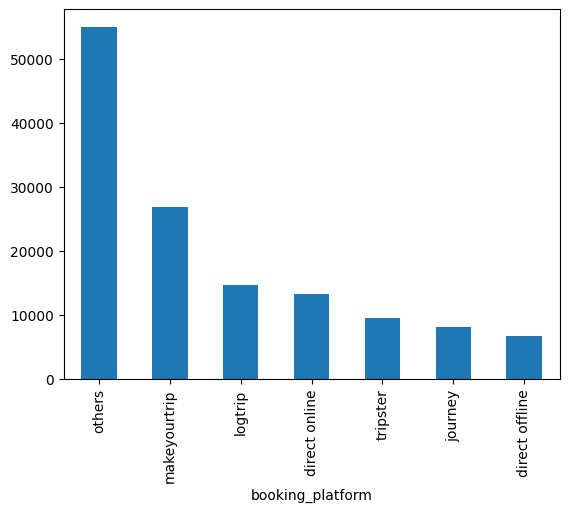

In [ ]:
# Visualize the booking platforms distribution
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [ ]:
# Get descriptive statistics for numerical columns
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<h3>Section 2: Data Cleaning for Bookings
<h5>Here, we clean the data by removing invalid entries (e.g., bookings with zero guests) and handling outliers in revenue.

In [ ]:
# Filter out bookings with zero or negative guests
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
# Calculate mean and standard deviation for revenue to detect outliers
mean,std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
print(mean,std)

15378.036937686695 93040.1549314641


In [ ]:
# Define a threshold for high revenue (mean + 3*std)
higher_rev_gen = mean + 3*std
print(higher_rev_gen)

294498.50173207896


In [ ]:
# Remove outliers in revenue
df_bookings = df_bookings[df_bookings.revenue_generated<higher_rev_gen]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
# Check for null values in the cleaned dataset
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

<h3>Section 3: Aggregated Bookings Analysis
<h5>This section analyzes aggregated booking data, including capacity, successful bookings, and occupancy calculations.

In [ ]:
# Load aggregated bookings data
df_aggregated_bookings = pd.read_csv("fact_aggregated_bookings.csv")

# Display the first few rows
df_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [ ]:
# Check the shape
df_aggregated_bookings.shape

(9200, 5)

In [ ]:
# Get info
df_aggregated_bookings.info()

<class 'pandas.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   str    
 2   room_category        9200 non-null   str    
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), str(2)
memory usage: 359.5 KB


In [ ]:
# List unique property IDs
print(df_aggregated_bookings.property_id.unique().tolist())

[16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561, 16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559, 18561, 18562, 18563, 19559, 19561, 17564, 18560]


In [ ]:
# Sum successful bookings by property
df_aggregated_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [ ]:
# Identify cases where successful bookings exceed capacity (potential data issues)
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [ ]:
# Find the property with maximum capacity
df_aggregated_bookings[df_aggregated_bookings.capacity == df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [ ]:
# Check for null values
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
# Identify rows with null capacity
df_aggregated_bookings[df_aggregated_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [ ]:
# Fill null capacities with median value
df_aggregated_bookings.fillna({"capacity" : df_aggregated_bookings.capacity.median()},inplace=True)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [ ]:
# Verify specific rows after filling
df_aggregated_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [ ]:
# Re-check for bookings exceeding capacity after filling
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [ ]:
# Calculate occupancy percentage
df_aggregated_bookings["occ_pct"] = df_aggregated_bookings.successful_bookings / df_aggregated_bookings.capacity
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [ ]:
# Round occupancy percentage to 2 decimal places
df_aggregated_bookings.occ_pct = df_aggregated_bookings.occ_pct.apply(lambda x:round((x*100),2))
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [ ]:
# Average occupancy by room category
df_aggregated_bookings.groupby(by="room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

<h3>Section 4: Merging with Rooms Data
<h5>Merge aggregated bookings with room details to analyze by room class.

In [ ]:
# Load rooms data
df_rooms = pd.read_csv("dim_rooms.csv")
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
# Merge with rooms data
df = pd.merge(df_aggregated_bookings,df_rooms,left_on="room_category",right_on="room_id")
df.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
4465,17563,14-Jun-22,RT3,9,16.0,56.25,RT3,Premium
39,18559,1-May-22,RT2,29,44.0,65.91,RT2,Elite
3816,17563,8-Jun-22,RT1,14,25.0,56.00,RT1,Standard
5522,19559,25-Jun-22,RT1,13,24.0,54.17,RT1,Standard
6701,18560,7-Jul-22,RT1,20,30.0,66.67,RT1,Standard


In [ ]:
# Average occupancy by room class
df.groupby(by="room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [ ]:
# Drop redundant column
df.drop("room_id",axis=1,inplace=True)
df.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
7882,17564,18-Jul-22,RT4,5,17.0,29.41,Presidential
3371,18560,3-Jun-22,RT3,12,24.0,50.00,Premium
3782,17564,7-Jun-22,RT4,7,17.0,41.18,Presidential
358,16558,4-May-22,RT3,6,8.0,75.00,Premium
422,19559,5-May-22,RT1,13,24.0,54.17,Standard


<h3>Section 5: Hotels Data Exploration
<h5>Explore hotel properties, categories, and cities.

In [ ]:
# Load hotels data
df_hotels = pd.read_csv("dim_hotels.csv")
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
# Unique hotel categories
df_hotels.category.unique().tolist()

['Luxury', 'Business']

In [ ]:
# Count by category
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [ ]:
# Unique cities
df_hotels.city.unique().tolist()

['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore']

In [ ]:
# Count by city
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

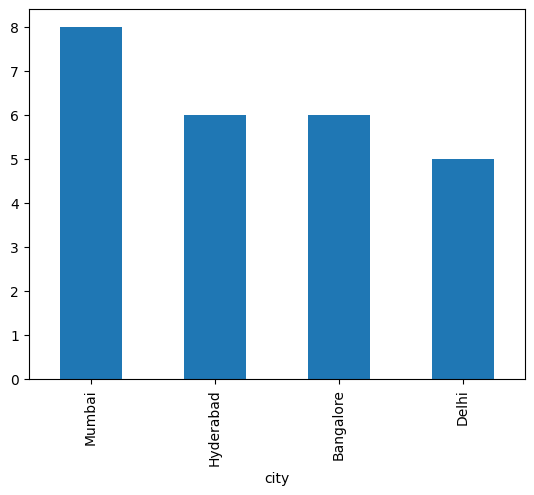

In [ ]:
# Visualize city distribution
df_hotels.city.value_counts().plot(kind="bar")

<h3>Section 6: Merging with Hotels Data
<h5>Merge to analyze occupancy by city and other hotel attributes.

In [ ]:
# Merge with hotels data
df = pd.merge(df,df_hotels,on="property_id")
df.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
7380,16561,13-Jul-22,RT4,6,10.0,60.00,Presidential,Atliq Blu,Luxury,Delhi
3220,18561,2-Jun-22,RT1,17,33.0,51.52,Standard,Atliq Blu,Luxury,Hyderabad
3629,16562,6-Jun-22,RT2,21,43.0,48.84,Elite,Atliq Bay,Luxury,Delhi
2464,16562,25-May-22,RT3,9,18.0,50.00,Premium,Atliq Bay,Luxury,Delhi
1432,19560,15-May-22,RT2,29,38.0,76.32,Elite,Atliq City,Business,Bangalore


In [ ]:
# Check for nulls after merge
df.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
occ_pct                0
room_class             0
property_name          0
category               0
city                   0
dtype: int64

In [ ]:
# Average occupancy by city
df.groupby(by="city")["occ_pct"].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

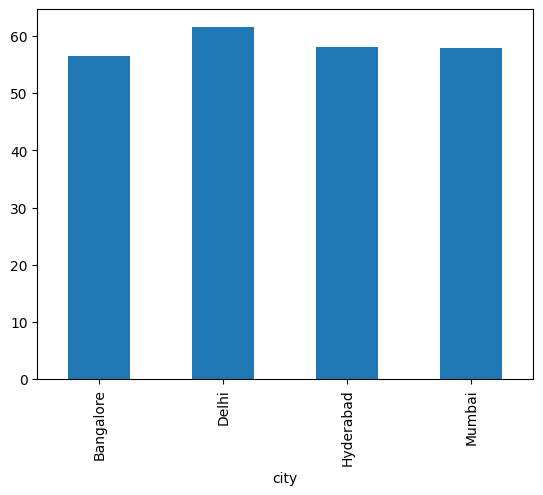

In [ ]:
# Visualize occupancy by city
df.groupby(by="city")["occ_pct"].mean().plot(kind="bar")

<h3>Section 7: Date Data Integration
<h5>Incorporate date dimensions for time-based analysis.

In [ ]:
# Load date data
df_date = pd.read_csv("dim_date.csv")
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
# Merge with date data
df = pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
5697,19563,23-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore,23-Jul-22,Jul 22,W 30,weekend
981,18560,19-May-22,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad,19-May-22,May 22,W 21,weekeday
4033,16563,28-Jun-22,RT2,23,38.0,60.53,Elite,Atliq Palace,Business,Delhi,28-Jun-22,Jun 22,W 27,weekeday
4849,19563,15-Jul-22,RT2,20,45.0,44.44,Elite,Atliq Palace,Business,Bangalore,15-Jul-22,Jul 22,W 29,weekeday
3472,18560,22-Jun-22,RT3,12,24.0,50.00,Premium,Atliq City,Business,Hyderabad,22-Jun-22,Jun 22,W 26,weekeday


In [ ]:
# Average occupancy by day type (weekday/weekend)
df.groupby(by="day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

In [ ]:
# Unique months
df["mmm yy"].unique().tolist()

['May 22', 'Jun 22', 'Jul 22']

In [ ]:
# Occupancy by city for June 2022
df[df["mmm yy"]=="Jun 22"].groupby(by="city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

<h3>Section 8: Incorporating New Data
<h5>Add new data for August and concatenate.

In [ ]:
# Load new August data
df_aug = pd.read_csv("new_data_august.csv")
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [ ]:
# Check shapes and columns for compatibility
df.shape

(6500, 14)

In [277]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='str')

In [278]:
df_aug.shape

(7, 13)

In [279]:
df_aug.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='str')

In [ ]:
# Concatenate datasets
latest_df = pd.concat([df,df_aug],ignore_index=True,axis=0)
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


<h3>Section 9: Revenue and Ratings Analysis
<h5>Analyze revenue and ratings from detailed bookings.

In [ ]:
# Review bookings data
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [ ]:
# Review hotels data
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
# Merge bookings with hotels
df_bookings_all = pd.merge(df_bookings,df_hotels,on="property_id")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
# Total revenue by city
df_bookings_all.groupby(by="city")["revenue_realized"].sum().round(2).sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

In [ ]:
# Info on merged data
df_bookings_all.info()

<class 'pandas.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  str    
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  str    
 3   check_in_date      134573 non-null  str    
 4   checkout_date      134573 non-null  str    
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  str    
 7   booking_platform   134573 non-null  str    
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  str    
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  str    
 13  category           134573 non-null  str    
 14  city               134573 non-null  str    
dtypes: float64(2), int64(3), str(10)
memory usage: 15.4 MB


In [ ]:
# Info on date data
df_date.info()

<class 'pandas.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   date      92 non-null     str  
 1   mmm yy    92 non-null     str  
 2   week no   92 non-null     str  
 3   day_type  92 non-null     str  
dtypes: str(4)
memory usage: 3.0 KB


In [ ]:
# Clean and convert check-in dates

df_bookings_all["check_in_date"] = df_bookings_all["check_in_date"].str.strip() 
                                    
df_bookings_all["check_in_date"] = pd.to_datetime( df_bookings_all["check_in_date"], errors="coerce" )

In [ ]:
# Verify conversion
df_bookings_all.info()

<class 'pandas.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  str           
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  str           
 3   check_in_date      55790 non-null   datetime64[us]
 4   checkout_date      134573 non-null  str           
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  str           
 7   booking_platform   134573 non-null  str           
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  str           
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  str           
 13  category           134573 non-null  str           
 14 

In [ ]:
# Clean date data
df_date["date"] = df_date["date"].str.strip()

In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"])

  df_date["date"] = pd.to_datetime(df_date["date"])


In [ ]:
# Verify conversion
df_date.info()

<class 'pandas.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[us]
 1   mmm yy    92 non-null     str           
 2   week no   92 non-null     str           
 3   day_type  92 non-null     str           
dtypes: datetime64[us](1), str(3)
memory usage: 3.0 KB


In [ ]:
# Merge with date data
df_bookings_all = pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [ ]:
# Revenue by month
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

In [ ]:
# Revenue by property
df_bookings_all.groupby(by="property_name")["revenue_realized"].sum()

property_name
Atliq Bay        26936115
Atliq Blu        26459751
Atliq City       29047727
Atliq Exotica    32436799
Atliq Grands     21644446
Atliq Palace     30945855
Atliq Seasons     6672245
Name: revenue_realized, dtype: int64

In [ ]:
# Average ratings by city
df_bookings_all.groupby(by="city")["ratings_given"].mean().round(2).sort_values(ascending=False)

city
Delhi        3.79
Hyderabad    3.65
Mumbai       3.63
Bangalore    3.41
Name: ratings_given, dtype: float64

<Axes: >

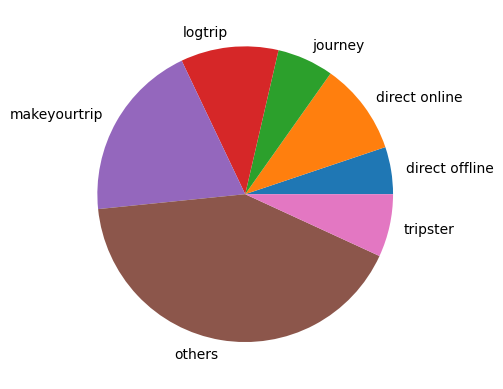

In [ ]:
# Visualize revenue by booking platform
df_bookings_all.groupby(by="booking_platform")["revenue_realized"].sum().plot(kind="pie")

<h3>Conclusion
<h5>This analysis provides insights into Atliq Grands' hospitality operations, including occupancy trends, revenue distribution, and customer ratings. Key findings include occupancy rates by city and room class, revenue by platform, and temporal patterns. Further analysis could involve predictive modeling or deeper segmentation.